# **Daniel Enciso**
# **CA04–Ensemble_Models_Algorithm**





In [87]:
#Importing needed programs  
import numpy as np
import pandas as pd
from pandas import DataFrame

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor  
from sklearn import metrics

#pip install xgboost
from sklearn import datasets
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import XGBClassifier

In [ ]:
#Mounting GoogleDrive in order to read the needed file
from google.colab import drive
drive.mount('/content/drive')


#1. Data Source and Contents

In [ ]:
#read the dataset using read_csv (Make sure your file is saved to a Google drive file similar to this path)
#note that later in the process, we will break out this csv file into two datatsets ('train' and 'test' files)
census_data = pd.read_csv('/content/drive/My Drive/MSBA_Colab_2020/ML_Algorithms/CA04/census_data.csv')

In [ ]:
#Returns a number of rows and columns in the 'data' datatset
census_data.shape

In [ ]:
#We obtain the descriptive statistics that summarize the central tendancy, dispersion, and shape of the dataset's distribution excluding NaN values. 
census_data.describe()
#here we see that only one column has numerical values. 
#Number of target classes (Column 'y'): 2 ('>50K' and '<=50K') [ Labels: 1, 0 ]

In [ ]:
#Reflects number of non-null values in each column. 
census_data.count()

In [ ]:
#Returns the number of null values on each column. 
census_data.isnull().sum()
#The results confirm that there are no null values. 

In [ ]:
#We obtain the range, columnn, number of non-null objects of each column, datatype and memory usage. 
census_data.info()

In [ ]:
#We obtain a preview of the first five records fo our dataset.
census_data.head()

In [ ]:
#Here we separtae the 'train' dataset from the'test' dataset.
split_values = census_data['flag'].unique()
print(split_values)

for value in split_values:
    train_data = census_data[census_data['flag']== 'train']
    test_data = census_data[census_data['flag']== 'test']


In [ ]:
#view the first five records of the train dataset to esure it was processed correctly
train_data.head()

In [ ]:
#view the first five records of the test dataset to esure it was processed correctly
test_data.head()

In [ ]:
#We will drop column 'flag' since we now have two different files, each labled train & test respectively. 
train_data.drop('flag', axis=1,inplace=True)
test_data.drop('flag', axis=1,inplace=True)

In [ ]:
test_data.head()

# Build Decision Tree Classifier Models

In [ ]:
# Here we are exporting feature coulumns as categorical values
for feat_val in ['hours_per_week_bin',
          'occupation_bin',
          'msr_bin',
          'capital_gl_bin',
          'race_sex_bin',
          'education_num_bin',
          'education_bin',
          'workclass_bin',
          'age_bin']:
    census_data[feat_val] = census_data[feat_val].astype('category')

In [ ]:
#We are now applying the label encoder
census_data[['hours_per_week_bin',
          'occupation_bin',
          'msr_bin',
          'capital_gl_bin',
          'race_sex_bin',
          'education_num_bin',
          'education_bin',
          'workclass_bin',
          'age_bin']]=census_data[['hours_per_week_bin',
          'occupation_bin',
          'msr_bin',
          'capital_gl_bin',
          'race_sex_bin',
          'education_num_bin',
          'education_bin',
          'workclass_bin',
          'age_bin']].apply(LabelEncoder().fit_transform)

In [ ]:
#Generate the first few records to confirm the lable encoder worked properly
census_data.head(10)

In [ ]:
#Run the for loop again on the newly transformed data set, in order to create our train/test daatsets.
for value in split_values:
    train_data = census_data[census_data['flag']== 'train']
    test_data = census_data[census_data['flag']== 'test']

#We will drop column 'flag' since we now have two different files, each labled train & test respectively.
train_data.drop('flag', axis=1,inplace=True)
test_data.drop('flag', axis=1,inplace=True)

In [ ]:
#We must now breakout each dataset into attributes and labels. 
x_train = train_data.drop('y',axis=1)
y_train = train_data['y']
x_test = test_data.drop('y',axis=1)
y_test = test_data['y']

#2. Finding Optimal Value of a key Hyper-parameter

For Ensemble Models, one of the key hyper-parameter is number of “estimators”.
Following is an example of fining the optimal value of “Maximum Depth”. Review the
following code snippet to understand how the optimal value of this hyper-parameter
(Max Depth = 10) is found by plotting a graph.

In [ ]:
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth=trees, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color='darkred',marker='o', grid=True)

#3. Building a Random Forest Model

Using Notebook, and the same data source from CA03, train a Random Forest Model.
Using similar approach of Section 2 above, plot a graph of Accuracy vs. n_estimator.
Use n_estimator values as [50,100,150,200,250,300,350,400,450,500].

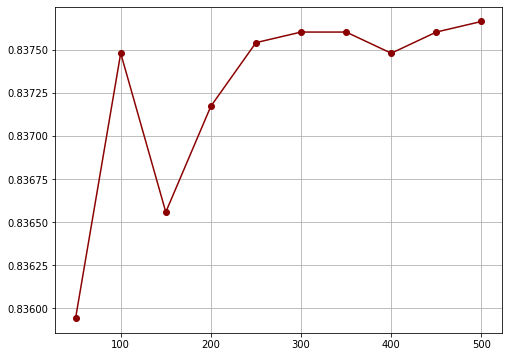

In [73]:
results = []
max_depth_options = [50,100,150,200,250,300,350,400,450,500]
for trees in max_depth_options:
    model = RandomForestClassifier(n_estimators=trees, random_state=0)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,6))
pd.Series(results, max_depth_options).plot(color='darkred',marker='o', grid=True)

Answer the following question:
1. Write your observations about the Classifier’s behavior with respect to the
number of estimators


The classifier's behavior with respect to the number of estimators is that it dropped at about 150, however it kept increasing afterwards.

2. Is there an optimal value of the estimator within the given range?

Yes, the optimal value is 500. 

In [100]:
#Random Forest code
RF_clf = RandomForestClassifier(n_estimators=100,random_state=0)
RF_clf.fit(x_train, y_train)
RF_y_pred = RF_clf.predict(x_test)

#Printing the accuracy score of our random forest code

RF_accu=metrics.accuracy_score(y_test, RF_y_pred)
RF_AUC=roc_auc_score(y_test, RF_y_pred)
print("Random Forest Accuracy", metrics.accuracy_score(y_test, RF_y_pred))
print("Random Forest AUC",roc_auc_score(y_test, RF_y_pred))

Random Forest Accuracy 0.8374792703150912
Random Forest AUC 0.7465207221075333


# 4. Building AdaBoost, Gradient Boost (classifier) and XGB Model

In [99]:
#Running the AdaBoost code
AB_clf = AdaBoostClassifier(n_estimators=100, random_state=0)
AB_clf.fit(x_train, y_train)
AB_y_pred = AB_clf.predict(x_test)

AB_accu=metrics.accuracy_score(y_test, AB_y_pred)
AB_AUC=roc_auc_score(y_test, AB_y_pred)
print("AdaBoost Accuracy", metrics.accuracy_score(y_test, AB_y_pred))
print("AdaBoost AUC",roc_auc_score(y_test, AB_y_pred))

AdaBoost Accuracy 0.8449112462379461
AdaBoost AUC 0.7460880510009302


In [76]:
#Running the GradientBoost code
GB_clf = GradientBoostingClassifier(n_estimators=100, random_state=0)
GB_clf.fit(x_train, y_train)
GB_y_pred = GB_clf.predict(x_test)

GB_accu=metrics.accuracy_score(y_test, GB_y_pred)
GB_AUC=roc_auc_score(y_test, GB_y_pred)
print("Gradient Boost Accuracy", metrics.accuracy_score(y_test, GB_y_pred))
print("Gradient Boost AUC",roc_auc_score(y_test, GB_y_pred))

Gradient Boost Accuracy 0.8466310423192679
Gradient Boost AUC 0.756732293417189


In [90]:
#Running the XGB Model

XGB_clf = XGBClassifier(n_estimators=100, random_state=0)
XGB_clf.fit(x_train, y_train)
XGB_y_pred = XGB_clf.predict(x_test)

XGB_accu=metrics.accuracy_score(y_test, XGB_y_pred)
XGB_AUC=roc_auc_score(y_test, XGB_y_pred)
print("XGB Accuracy", metrics.accuracy_score(y_test, XGB_y_pred))
print("XGB AUC",roc_auc_score(y_test, XGB_y_pred))

XGB Accuracy 0.847122412628217
XGB AUC 0.756784577776356


In [98]:
#Printing the comparison table
df = DataFrame ([[RF_accu,RF_AUC],[AB_accu,AB_AUC],[GB_accu,GB_AUC],[XGB_accu,XGB_AUC]], columns=['Accuracy', 'AUC'], index=['Random Forest','AdaBoost','Gradient Booost','XGB'])
print('*Performance Comparison Table*')
print(df)

*Performance Comparison Table*
                 Accuracy       AUC
Random Forest    0.837664  0.747090
AdaBoost         0.844788  0.746008
Gradient Booost  0.846631  0.756732
XGB              0.847122  0.756785


In [95]:
print('Common Parameters')
print('n_estimators = 100')
print('random_state = 0') 

Common Parameters
n_estimators = 100
random_state = 0
